In [10]:
import os
from flame import Machine
import flame_utils
import numpy as np
import matplotlib.pyplot as plt
import labframePlotFun
%matplotlib inline
#%matplotlib qt #for showing graphs in second window

In [11]:
# create FLAME machine
home = "/home/devuser/machine-rea/"
latfile = "ReA3_JENSA.lat"
latfile_handle = open(home + latfile, 'rb')
m = Machine(latfile_handle)

INFO: 2019-04-05 12:18:13,767: flame.machine: Constructing Machine w/ sim_type='MomentMatrix


In [12]:
# create BeamState object
bs = flame_utils.BeamState(machine=m)

In [13]:
# create ModelFlame object
fm = flame_utils.ModelFlame()

In [14]:
# setup machine and state
fm.bmstate, fm.machine = bs, m

In [15]:
# setup observers and run flame model
#obs = fm.get_index_by_type(type='bpm')['bpm']
#obs = fm.get_index_by_type(type='marker')['marker']
obs = range(len(fm.machine))
r,s = fm.run(monitor=obs)

In [16]:
# get dadtat of interest from running results
data = fm.collect_data(r, pos=True, x0_env=True, x0_rms=True, y0_env=True, y0_rms=True, ref_IonEk=True)

INFO: 2019-04-05 12:18:34,610: flame.machine: Constructing Machine w/ sim_type='MomentMatrix


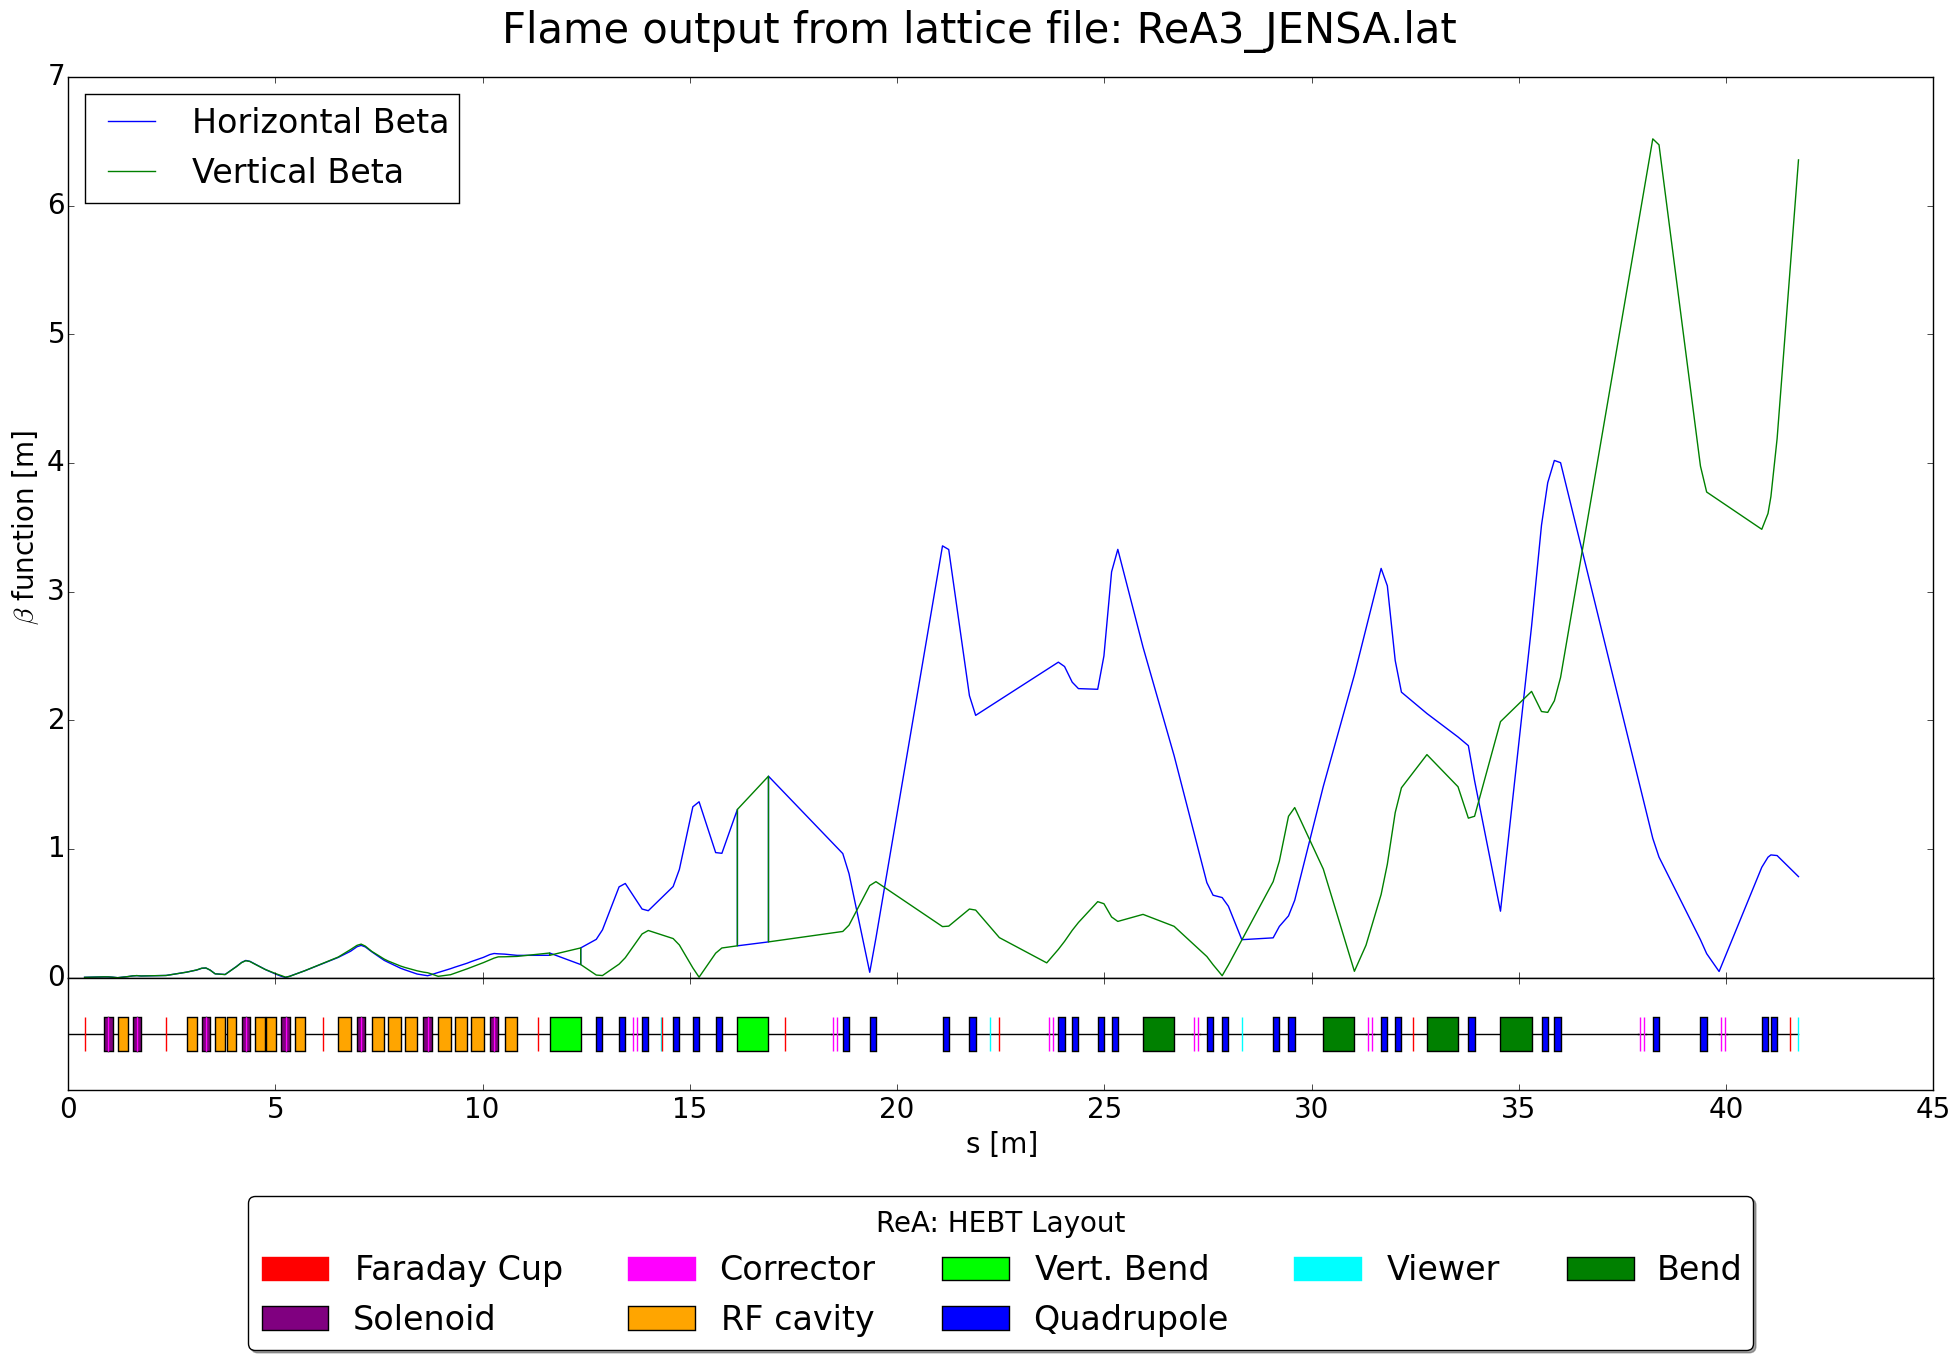

In [17]:
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [20,12]
fig,(ax1,ax2)=plt.subplots(2, 1,gridspec_kw = {'height_ratios':[8,1]}, sharex=True)
fig.suptitle('Flame output from lattice file: ' + latfile, fontsize=30)

ax2,xmin,xmax,ymin,ymax = labframePlotFun.labframePlot(home + latfile, ax2, 0)
ax2.set_ylim([-1.0,1.0])
plt.setp(ax2, yticks=[])

ax1.plot(data['pos'], data['x0_rms']/1000.0, label='Horizontal Beta')
ax1.plot(data['pos'], data['y0_rms']/1000.0, label='Vertical Beta')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function [m]')
ax1.legend(loc='best')

fig.tight_layout(rect=(0,0,1,0.96))
plt.subplots_adjust(hspace=0.0)
plt.show()

In [9]:
#fm.bmstate.beammatrix_all

array([[[  1.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00]],

       [[  0.00000000e+00],
        [  6.50000000e-05],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00]],

       [[  0.00000000e+00],
        [  0.00000000e+00],
        [  1.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00]],

       [[  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  6.50000000e-05],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00]],

       [[  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00]],

       [[ 